In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 读取图像
img = cv2.imread(r'..\images\Canon\01 - Nov - 23\JPG\DSC_0537 (Pot 2) .JPG')
# 转换为灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 应用高斯模糊
gray_blurred = cv2.GaussianBlur(gray, (9, 9), 2, 2)

# 霍夫变换圆检测
circles = cv2.HoughCircles(gray_blurred, 
                           cv2.HOUGH_GRADIENT, 1, 20, 
                           param1=50, param2=30, minRadius=1, maxRadius=40)


In [7]:
print(circles.shape)

(1, 9, 3)


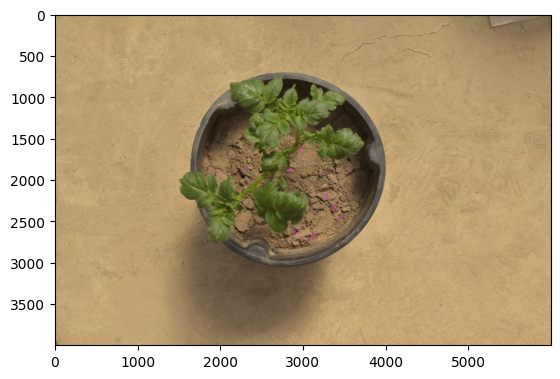

In [6]:
# 绘制检测到的圆
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # 圆心
        cv2.circle(img, center, 1, (0, 100, 100), 3)
        # 圆轮廓
        radius = i[2]
        cv2.circle(img, center, radius, (255, 0, 255), 3)

# 显示结果
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))